#### Import of Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [39]:
df = pd.read_csv('datasets/car.csv')

# Buying, Maint: 4 for vhigh and 3 for high, 2 for med, 1 for low
df=df.replace("vhigh",4)
df=df.replace("high",3)  
df=df.replace("med",2)  
df=df.replace("low",1)    
df=df.replace("small",1) 
df=df.replace("big",3) 

# Replacing 5+ doors with 5 and 4+ persons with 5
df=df.replace("5more",5) 
df=df.replace("more",5) 


In [40]:
df.head(5)

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Acceptability
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [41]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Buying         1728 non-null   int64 
 1   Maint          1728 non-null   int64 
 2   Doors          1728 non-null   object
 3   Persons        1728 non-null   object
 4   Lug_boot       1728 non-null   int64 
 5   Safety         1728 non-null   int64 
 6   Acceptability  1728 non-null   object
dtypes: int64(4), object(3)
memory usage: 94.6+ KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

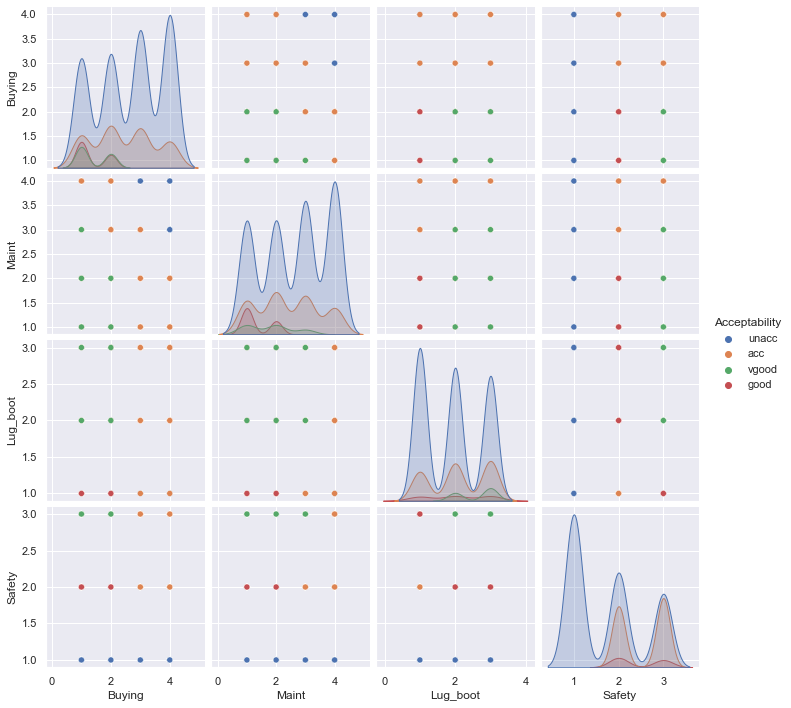

In [42]:
sns.pairplot(df, hue='Acceptability')
plt.show()

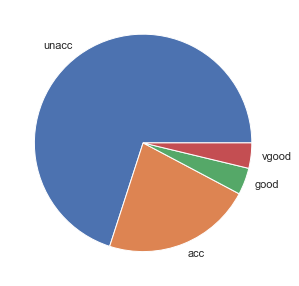

In [43]:
y =df['Acceptability']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [44]:
X = df.drop(columns=['Acceptability'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Buying,1728.0,2.5,1.118358,1.0,1.75,2.5,3.25,4.0
Maint,1728.0,2.5,1.118358,1.0,1.75,2.5,3.25,4.0
Lug_boot,1728.0,2.0,0.816733,1.0,1.00,2.0,3.00,3.0
Safety,1728.0,2.0,0.816733,1.0,1.00,2.0,3.00,3.0


#### Standardize the Data

In [45]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Buying,1728.0,0.000000e+00,1.000289,-1.341641,-0.670820,0.000000,0.670820,1.341641
Maint,1728.0,0.000000e+00,1.000289,-1.341641,-0.670820,0.000000,0.670820,1.341641
Doors,1728.0,1.644775e-17,1.000289,-1.341641,-0.670820,0.000000,0.670820,1.341641
Persons,1728.0,1.685894e-16,1.000289,-1.336306,-1.336306,0.267261,1.069045,1.069045
Lug_boot,1728.0,0.000000e+00,1.000289,-1.224745,-1.224745,0.000000,1.224745,1.224745
Safety,1728.0,0.000000e+00,1.000289,-1.224745,-1.224745,0.000000,1.224745,1.224745


#### Observations and Variables

In [46]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

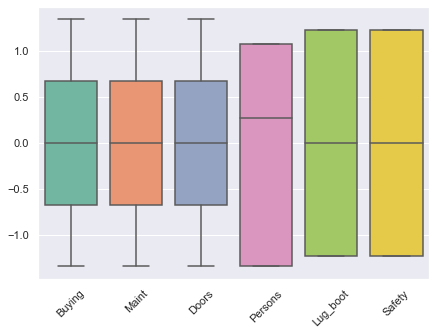

In [47]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

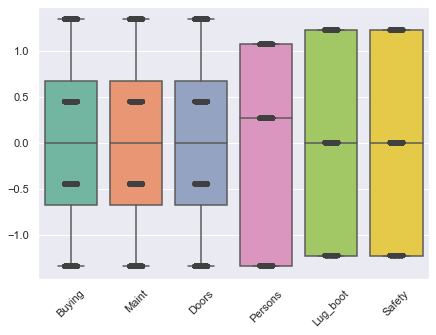

In [48]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

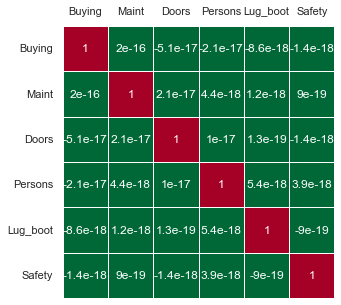

In [49]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [50]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [51]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.647031,1.408422,-1.05247,1.514815,0.535716,1.341641
1,-1.724794,0.187982,-1.05247,1.580044,0.520799,1.341641
2,-1.802556,-1.032459,-1.05247,1.645273,0.505883,1.341641
3,-1.449931,1.335454,-1.05247,0.550345,1.260716,1.341641
4,-1.527693,0.115014,-1.05247,0.615574,1.245799,1.341641
...,...,...,...,...,...,...
1723,1.533069,-0.109360,1.05247,-0.454624,-1.032579,-1.341641
1724,1.455307,-1.329801,1.05247,-0.389395,-1.047496,-1.341641
1725,1.807933,1.038113,1.05247,-1.484323,-0.292663,-1.341641
1726,1.730170,-0.182328,1.05247,-1.419094,-0.307579,-1.341641


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (16.6% expl.var)', ylabel='PC2 (16.6% expl.var)'>)

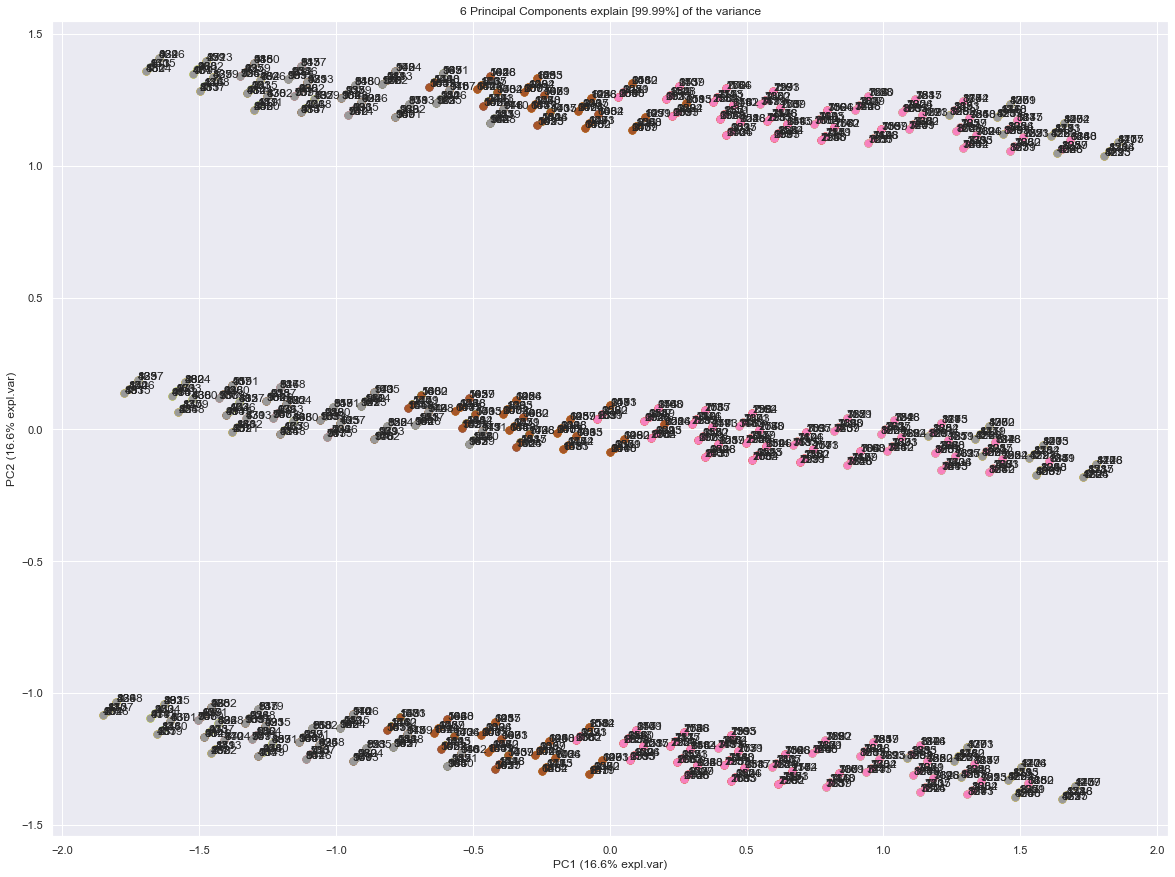

In [33]:
model.scatter(label=True, legend=False)

Eigenvectors

In [34]:
A = out['loadings'].T

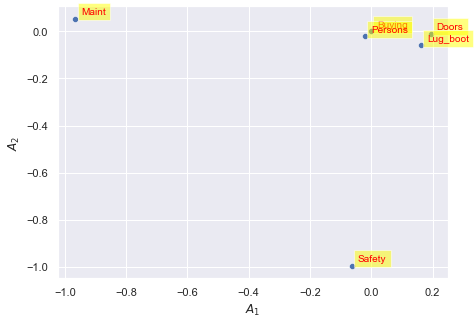

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

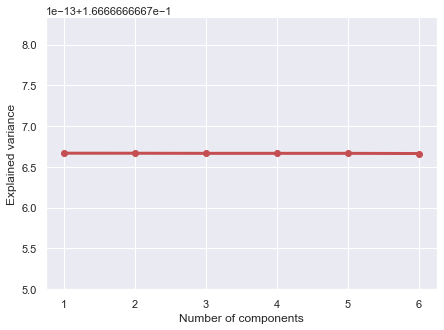

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

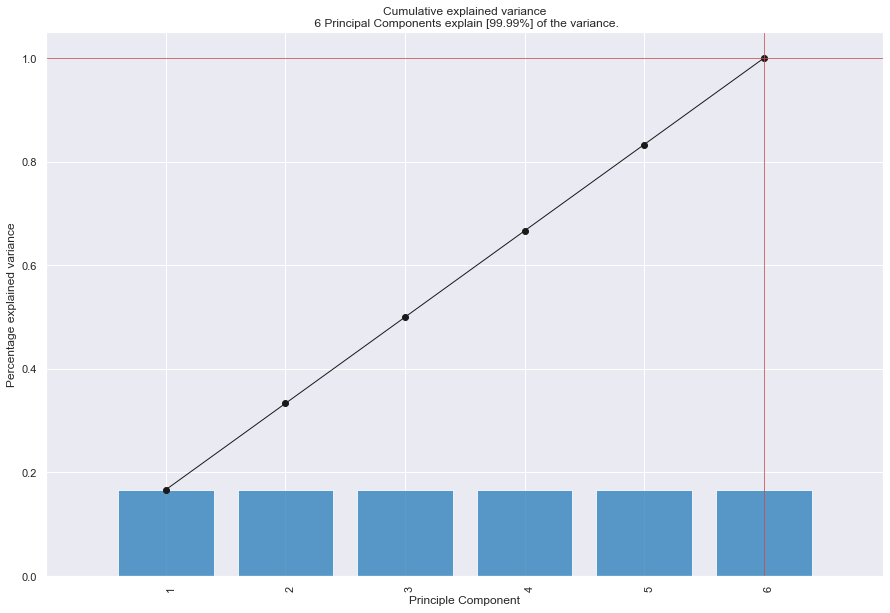

<Figure size 504x360 with 0 Axes>

In [37]:
model.plot();